# Vergleichsmessungen der einzelnen Feldkonfigurationen

Um sicherzustellen, dass das alles übersichtlich bleibt, ballern wir das in Jupyter-Notebooks. Das gibt uns die Gelegenheit jeder Messung eine einzelne Messiteration seperat zu analysieren

In [5]:
# Funktionspräambel: Relevante Module und Funktionen für die folgenden Analyseschritte
import sys
import os

# Pfad zum benachbarten Ordner 'Programme'
motherdir = os.path.abspath(os.path.join(os.getcwd()))
programme_dir = os.path.join(motherdir, 'Analyseprogramme')

# Füge den Pfad zum benachbarten Ordner dem sys.path hinzu
sys.path.append(programme_dir)

from Sonstiges import get_file_names,Gain_best
from Spektrenanpassung import *
from Auslese import *
import matplotlib.pyplot as plt
from Stromverarbeitung import *

findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.


COMPASS.mca
0.1051+/-0.0008
Ottnad.mca
0.1292+/-0.0014


findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.
findfont: Font family 'Calibri' not found.


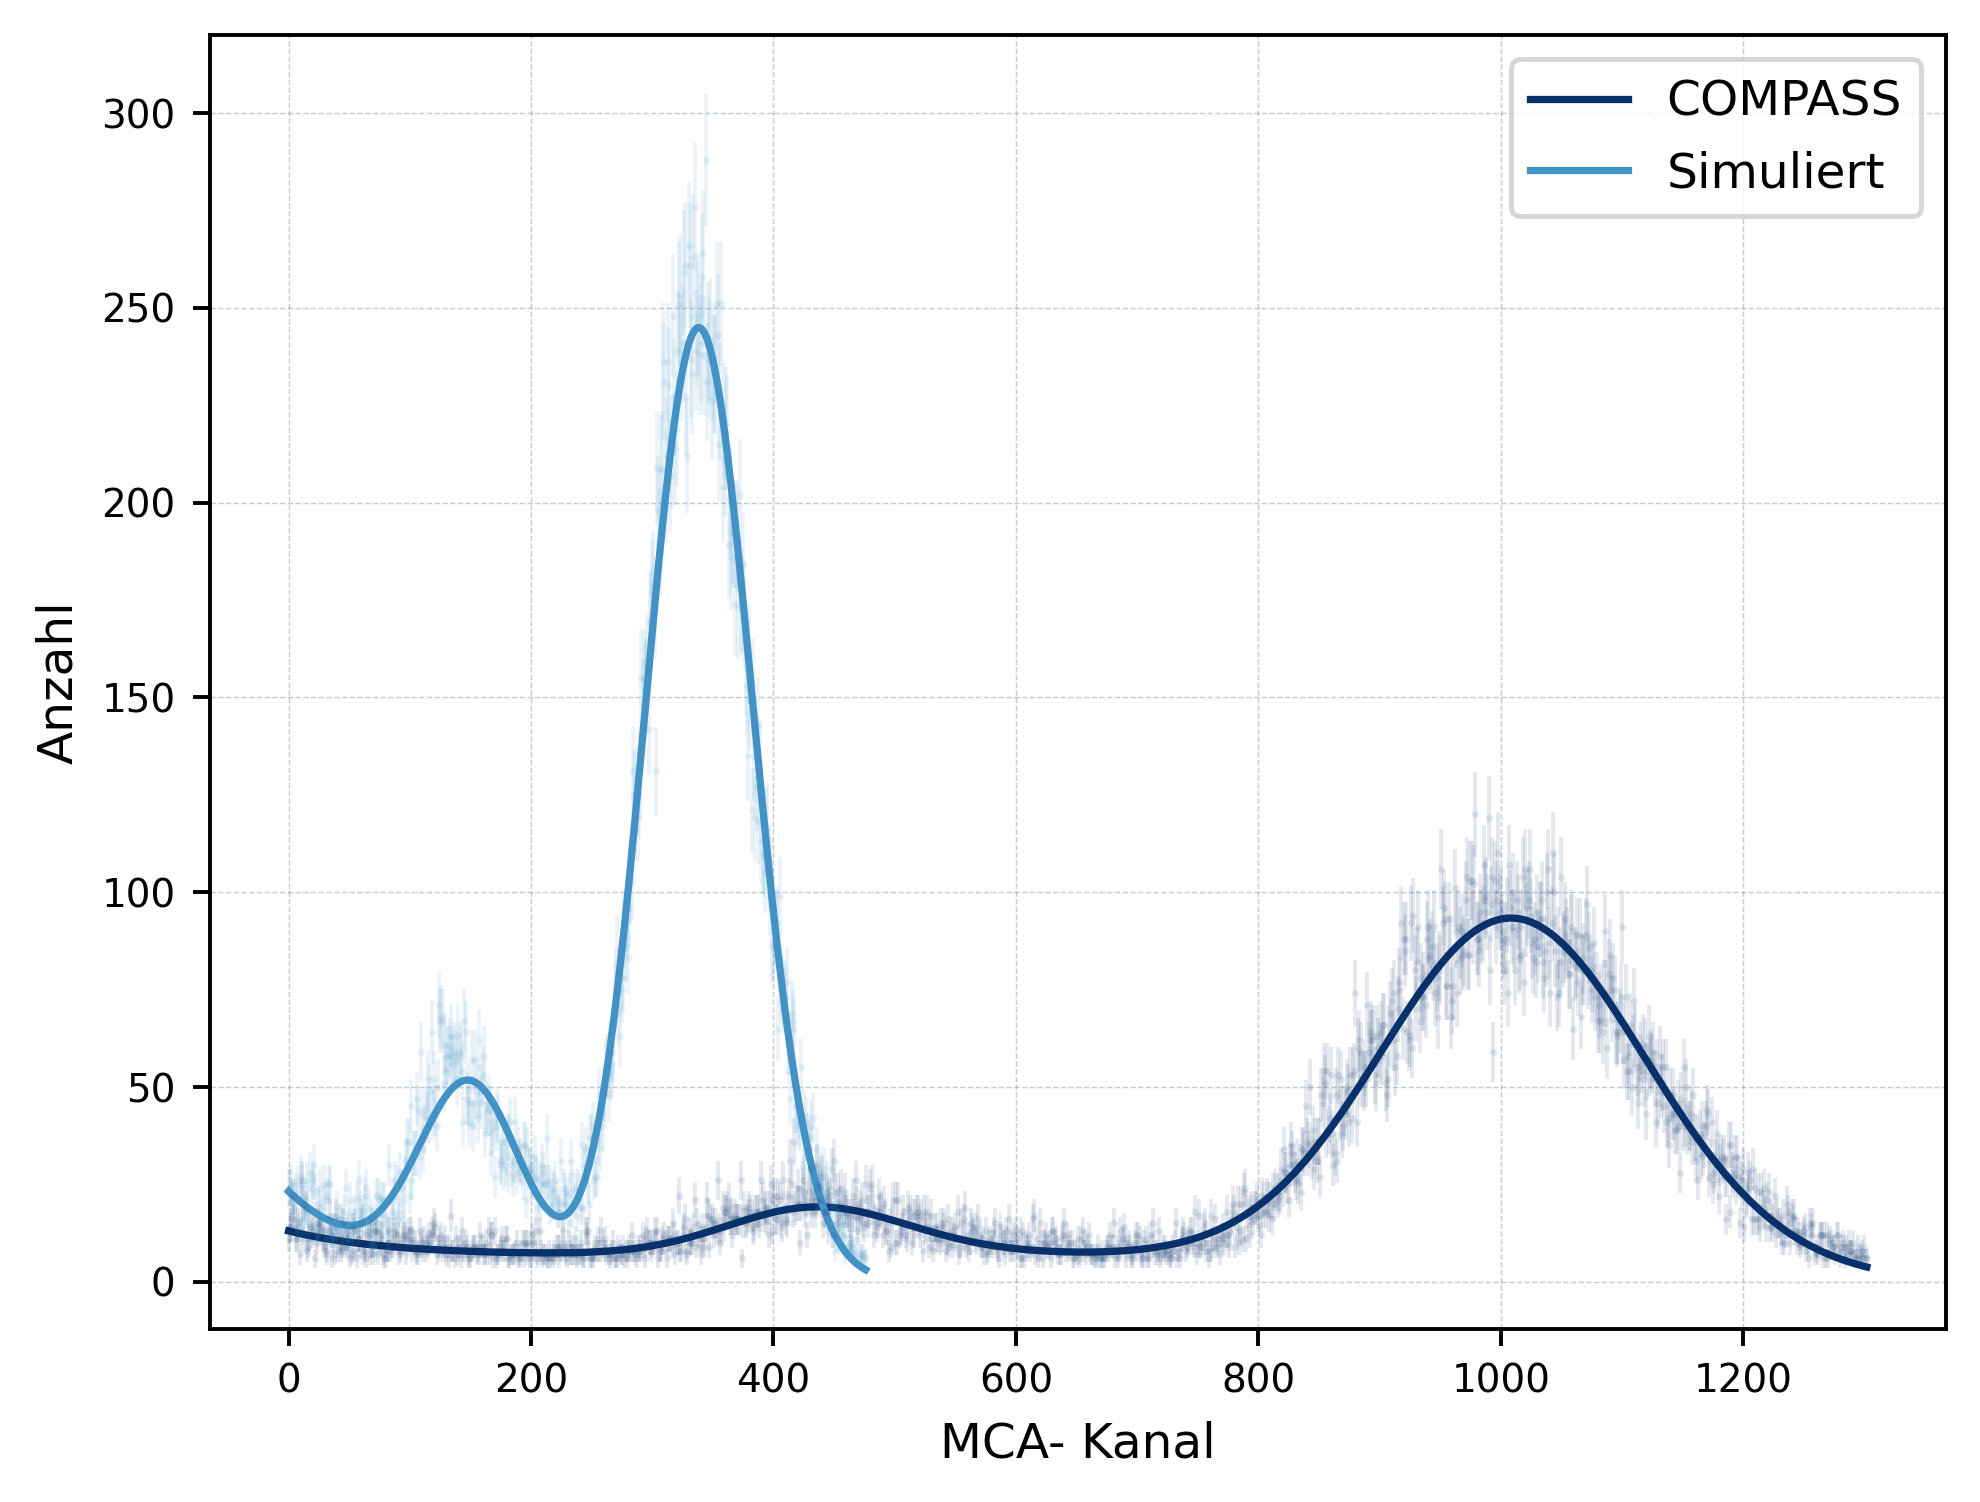

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
#from adjustText import adjust_text
from uncertainties  import ufloat

file_color_map = ['#08306b', '#4292c6', '#08519c','#c6dbef','#2171b5' ]

# Pfad zum Ordner mit den Dateien
folder_path = r'/home/spors/Documents/Auswertungsprogramme/Messdaten/Vergleichsmessung bestimmte Einstellungen'

# Hole die Dateinamen ohne Erweiterung
file_names = get_file_names(folder_path)
plt.figure(dpi=350)

texts = []  # Liste zum Speichern der Textobjekte

# Iteriere über jede Datei und führe die Spektren-Fits durch
for i, file_name in enumerate(file_names):
    file_path = os.path.join(folder_path, file_name)
    print(file_name)
    # Lese die Daten aus der Datei aus
    MCA, counts, dCounts, identification = read_out(file_path)
    
    # Führe den Spektren-Fit durch (Beispiel-Funktion)
    fit_result = SpektrenAnpassung(MCA, counts, dCounts)
    
    # Plotten der Daten und des Fits
    labels = ['COMPASS', 'Simuliert' ,'V3']
    
    # Finde den Hochpunkt der Fitkurve
    max_index = np.argmax(fit_result.eval(x=MCA))
    max_x = MCA[max_index]
    max_y = fit_result.eval(x=MCA)[max_index]
    
    
    plt.errorbar(MCA, counts, yerr=dCounts, fmt='.', markersize=1.0, capsize=0, elinewidth=0.8, alpha=0.1, color=file_color_map[i])
    plt.plot(MCA, fit_result.eval(x=MCA), color=file_color_map[i],label=labels[i])
    plt.legend(loc='best',fontsize=10)

    sigma=ufloat(fit_result.params['p2'].value, fit_result.params['p2'].stderr)
    mu=ufloat(fit_result.params['p1'].value, fit_result.params['p1'].stderr)
    print(sigma/mu)

    

# Linie definieren
line_x = np.linspace(967, 967, 1000)
line_y = np.linspace(0,300,1000)

# Streifenbreite definieren
streifen_dicke = 120

# Bereich für den Streifen definieren
upper_bound = line_x + streifen_dicke 
lower_bound = line_x - streifen_dicke/4

# Streifen plotten
#plt.fill_betweenx(line_y, lower_bound, upper_bound, color='slategray', alpha=0.3, label='Streifen')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tick_params(axis='y', which='major', labelsize=8)
plt.grid(True, color="slategray", linewidth="0.3", linestyle="--", alpha=0.4)
plt.xlabel('MCA- Kanal', fontsize=10, fontfamily='Calibri')
plt.ylabel('Anzahl', fontsize=10, fontfamily='Calibri')

# Verwenden Sie adjust_text, um die Textbeschriftungen anzupassen
#adjust_text(texts)  # Entfernen Sie die Pfeile vollständig
plt.savefig("Spektrenvergleich.pdf", format="pdf", bbox_inches="tight")
plt.show()

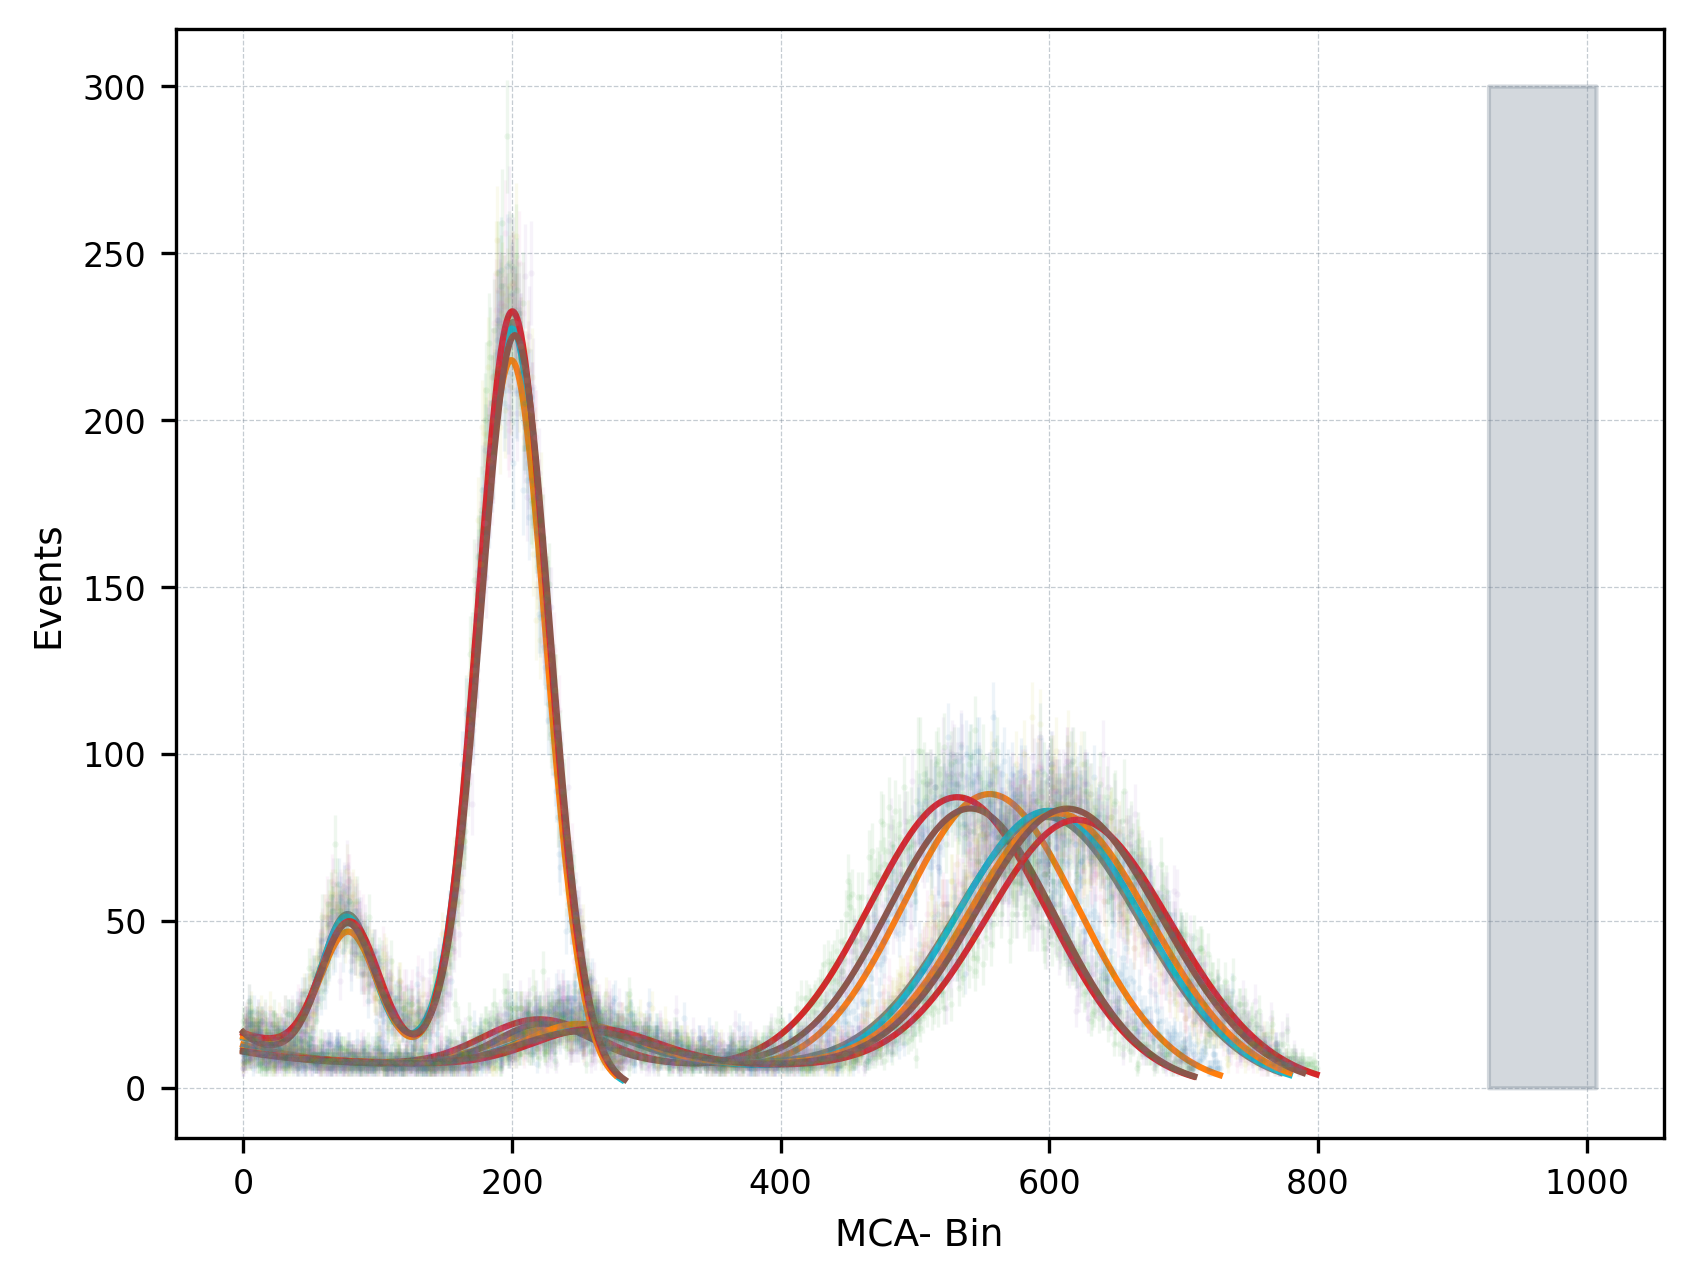

['/home/spors/Documents/Auswertungsprogramme/Messdaten/Eichmessungen/Improved', '/home/spors/Documents/Auswertungsprogramme/Messdaten/Eichmessungen/COMPASS', '/home/spors/Documents/Auswertungsprogramme/Messdaten/Eichmessungen/Ottnad']
------------------------- Gain -------------------------
[12088.3234226969, 11335.299422416792, 4707.967693999673]
[171.66321166460924, 128.23969521319867, 59.984292990403425]
------------------------- Energieauflösung -------------------------
[27.27394269254613+/-0.16944612975219198, 25.829495891899292+/-0.11368739220908841, 29.65790251533071+/-0.18578919933929883]


In [11]:

Messzeit = 80
gain, dgain = [], []
Erwartungswert = []
file_color_map = ['#084594', '#deebf7', '#2171b5', '#c6dbef', '#4292c6']

# Pfad zum Ordner mit den Dateien
base_folder_path = r'/home/spors/Documents/Auswertungsprogramme/Messdaten/Eichmessungen'


def get_subfolders(folder_path):
    subfolders = []
    for root, dirs, files in os.walk(folder_path):
        for dir in dirs:
            subfolders.append(os.path.join(root, dir))
    return subfolders

subfolders = get_subfolders(base_folder_path)
gain, dgain = [], []
Erwartungswert, dErwartungswert = [],[]
Energyres=[]

plt.figure(dpi=300)
for subfolder in subfolders:
    Vers, dVers = [], []
    mean,dmean = [], []
    Energie=[]
    # Hole die Dateinamen ohne Erweiterung
    folder_path=os.path.join(base_folder_path,subfolder)
    file_names = get_file_names(folder_path)
    file_names = [f for f in file_names if not f.endswith('Offset.dat') and not f.endswith('offsetII.dat') and f.endswith('.mca')]

    # Iteriere über jede Datei und führe die Spektren-Fits durch
    for i, file_path in enumerate(file_names):
        file_name = os.path.splitext(os.path.basename(file_path))[0]
        # Selektiere die Dateien
        mca_file_path = os.path.join(folder_path, file_name + '.mca')
        dat_file_path = os.path.join(folder_path, file_name + '.dat')
        offset_file_path = os.path.join(base_folder_path, 'Offset.dat')


        Strom, dStrom = Offset(dat_file_path)
            # Lese die Daten aus der Datei aus
        MCA, counts, dCounts, identification = read_out(mca_file_path)
        fit_result = SpektrenAnpassung(MCA, counts, dCounts)
            # Finde den Hochpunkt der Fitkurve
        plt.errorbar(MCA, counts, yerr=dCounts, fmt='.', markersize=1.0, capsize=0, elinewidth=0.8, alpha=0.075)
        plt.plot(MCA, fit_result.eval(x=MCA))

        offset, doffset = Offset(offset_file_path)
        I_Ion, dI_Ion = I_ionisation(MCA, counts, Messzeit, fit_result)
        Gain, dGain = Gain_best(Strom, I_Ion, offset, dStrom, doffset, dI_Ion)
        EW = fit_result.params['p1'].value
        dEW = fit_result.params['p1'].stderr
        mu=ufloat(fit_result.params['p1'].value, fit_result.params['p1'].stderr)
        sigma=ufloat(fit_result.params['p2'].value, fit_result.params['p2'].stderr)
        Energie.append(2*np.sqrt(2*np.log(2))*sigma/mu *100)
        mean.append(EW)
        dmean.append(dEW)
        Vers.append(Gain)
        dVers.append(dGain)
    dVers=np.array(dVers)
    gain.append(np.mean(Vers))
    dgain.append(2/len(dVers)*np.sqrt(np.sum((dVers**2))))
    Erwartungswert.append(np.mean(mean))
    dErwartungswert.append(np.std(mean))    
    Energyres.append(np.mean(Energie))
# Linie definieren
line_x = np.linspace(967, 967, 1000)
line_y = np.linspace(0,300,1000)

# Streifenbreite definieren
streifen_dicke = 40

# Bereich für den Streifen definieren
upper_bound = line_x + streifen_dicke 
lower_bound = line_x - streifen_dicke 

# Streifen plotten
plt.fill_betweenx(line_y, lower_bound, upper_bound, color='slategray', alpha=0.3, label='Streifen')
plt.tick_params(axis='x', which='major', labelsize=8)
plt.tick_params(axis='y', which='major', labelsize=8)
plt.grid(True, color="slategray", linewidth="0.3", linestyle="--", alpha=0.4)
plt.xlabel('MCA- Bin', fontsize=9)
plt.ylabel('Events', fontsize=9)
plt.show()
print(subfolders)
print('------------------------- Gain -------------------------')
print(gain)
print(dgain)
print('------------------------- Energieauflösung -------------------------')
print(Energyres)

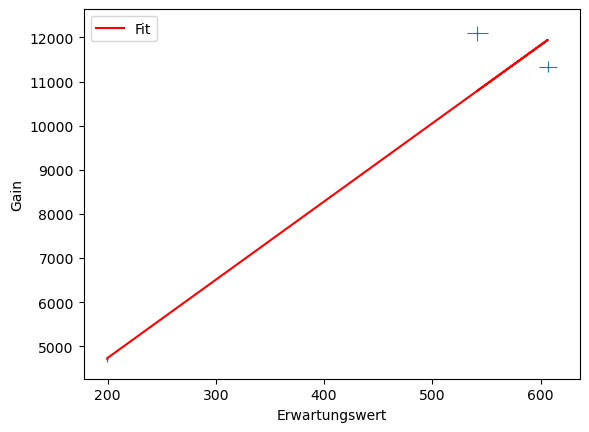

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from lmfit import Model

# Angenommen, Erwartungswert, gain und dgain sind Listen oder Arrays
# Konvertiere dgain in ein NumPy-Array, falls es noch nicht ist
dgain = np.array(dgain)

# Plotten der Daten mit Fehlerbalken
plt.errorbar(Erwartungswert, gain, yerr=dgain, xerr=dErwartungswert, fmt='.', markersize=1.0, capsize=0, elinewidth=0.8, alpha=1)

# Definiere das lineare Modell
def linear_model(x, slope, intercept):
    return slope * x + intercept

# Erstelle ein lmfit-Modell
model = Model(linear_model)

# Initiale Parameter schätzen
params = model.make_params(slope=1, intercept=0)

# Führe den Fit durch
fit_result = model.fit(gain, params, x=Erwartungswert, weights=1/dgain)


# Extrahiere den Fit selbst
fit_y = fit_result.best_fit



# Plotten der Daten und des Fits
plt.plot(Erwartungswert, fit_y, 'r-', label='Fit')
plt.xlabel('Erwartungswert')
plt.ylabel('Gain')
plt.legend()
plt.show()